https://www.datacamp.com/courses/statistical-thinking-in-python-part-1
# 1. Probability density functions (PDF)
## Continuous variables: quantities that can take any value, not just discrete values. e.g. the speed of a train.
## Continuous analog to the PMF. The PDF is a mathematical description of the relative likelihood of observing a value of a continuous varible. The probability is given by the area under the PDF.
## Normal CDF: continuous distribution functions
# 2. Introduction to the Normal distribution
## It describes a continuous variable whose PDF is symmetric and has a single peak. It is parametrized by 2 parameters. The mean determines where the center of the peak is. The standard deviation is a measure of how wide the peak is, or how spread out the data are.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
light = pd.read_csv('datasets/michelson_speed_of_light.csv')
light.head(3)

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles


In [49]:
light.shape

(100, 15)

In [50]:
speed = light['velocity of light in air (km/s)']

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00044444, 0.        , 0.00155556, 0.00244444, 0.006     ,
        0.00555556, 0.00222222, 0.00244444, 0.00133333, 0.00022222]),
 array([299620., 299665., 299710., 299755., 299800., 299845., 299890.,
        299935., 299980., 300025., 300070.]),
 <a list of 10 Patch objects>)

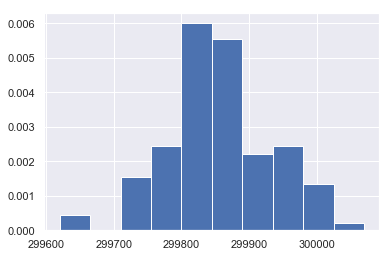

In [51]:
sns.set()
plt.hist(speed, normed=True)

In [52]:
def f(m):
    n=len(m)
    x=np.sort(m)
    y=np.arange(1, 1+n)/n
    return x, y

In [53]:
mean = np.mean(speed)
mean

299852.4

In [54]:
std = np.std(speed)
std

78.61450247886843

Plot the theoretical and empirical CDFs on the same plot.

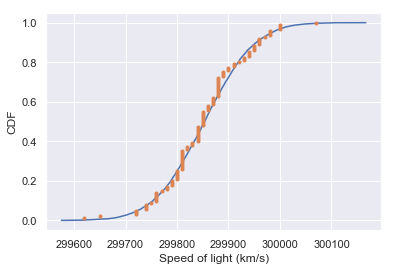

In [55]:
samples = np.random.normal(mean, std, size=10000)
x, y = f(speed)
x_theo, y_theo = f(samples)

sns.set()
plt.plot(x_theo, y_theo)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Speed of light (km/s)')
plt.ylabel('CDF')
plt.show()

# Practice 2
## 1) The Normal PDF

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


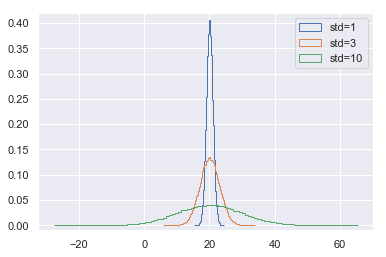

In [56]:
# Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. 
std1 = np.random.normal(20, 1, size=100000)
std2 = np.random.normal(20, 3, size=100000)
std3 = np.random.normal(20, 10, size=100000)

plt.hist(std1, normed=True, histtype='step', bins=100)
plt.hist(std2, normed=True, histtype='step', bins=100)
plt.hist(std3, normed=True, histtype='step', bins=100)

plt.legend(('std=1', 'std=3', 'std=10'))
plt.ylim(-0.01, 0.42)
plt.show()

## 2) The Normal CDF

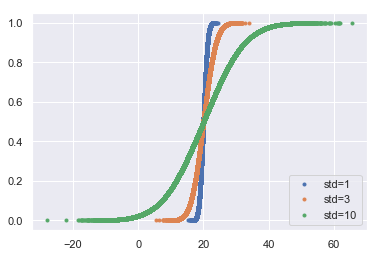

In [57]:
x1, y1 = f(std1)
x2, y2 = f(std2)
x3, y3 = f(std3)

plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(x3, y3, marker='.', linestyle='none')

plt.legend(('std=1', 'std=3', 'std=10'), loc='lower right')
plt.show()

# 3. The Normal distribution: Properties and warnings???


In [151]:
belmont = pd.read_csv('datasets/belmont.csv')
belmont.head(3)

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5


In [152]:
belmont.tail()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,Belmont,1.5
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,Belmont,1.5
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,Belmont,1.5
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,Belmont,1.5
90,1926,Crusader,Albert Johnson,George Conway,Glen Riddle Farm,2:32.20,Belmont,1.5


In [153]:
belmont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
Year       91 non-null int64
Winner     91 non-null object
Jockey     91 non-null object
Trainer    91 non-null object
Owner      91 non-null object
Time       91 non-null object
Track      91 non-null object
miles      91 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [154]:
belmont['Time'] = pd.to_datetime(belmont['Time'], format='%M:%S.%f').dt.time
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,00:02:28.510000,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",00:02:26.650000,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,00:02:28.520000,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,00:02:30.700000,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,00:02:30.420000,Belmont,1.5


In [155]:
belmont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
Year       91 non-null int64
Winner     91 non-null object
Jockey     91 non-null object
Trainer    91 non-null object
Owner      91 non-null object
Time       91 non-null object
Track      91 non-null object
miles      91 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [164]:
time = pd.to_numeric(belmont['Time'], errors='ignore')
time.head()

0    00:02:28.510000
1    00:02:26.650000
2    00:02:28.520000
3    00:02:30.700000
4    00:02:30.420000
Name: Time, dtype: object

# 4. The Exponential Distribution: np.random.exponential(mean, size=10000)
#### Poisson distributed: the number of buses that will arrive per hour.
#### Exponentially distributed: the amount of time between arrivals of buses. It has a single parameter, the mean waiting time. The Exponential distribution describes the waiting times between rare events.
#### The poisson process, i.e. the timing of 1 incident is independent of all others. So the time between incidents should be exponentially distributed.
How long must we wait to see both a no-hitter and then a batter hit the cycle? 
<p>Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.
<p>The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.
<p>Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle. 

In [191]:
"""Compute time for arrival of 2 successive Poisson processes & draw samples out of 2 exponential distributions"""
def f(x1, x2, size=1):
    y1 = np.random.exponential(x1, size)
    y2 = np.random.exponential(x2, size)
    return y1 + y2

The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games. Use the successive_poisson() function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


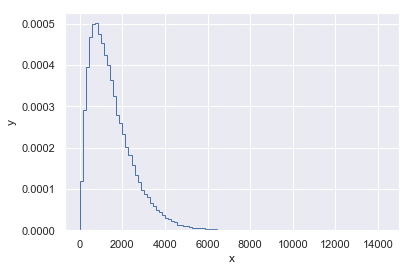

In [193]:
# Draw samples of waiting times: waiting_times
wait = np.array(f(764, 715, 100000))
plt.hist(wait, bins=100, normed=True, histtype='step')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [194]:
def ecdf(m):
    x=np.sort(m)
    n=len(m)
    y=np.arange(1, 1+n)/n
    return x, y

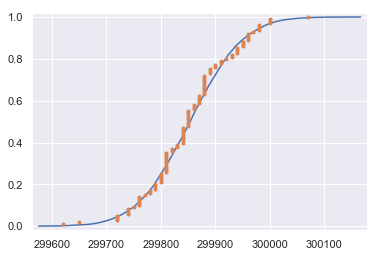

In [197]:
plt.plot(x_theo, y_theo)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)

In [ ]:
a = np.random.exponential(x)